In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Alt fungerer! Hurra!!")

Alt fungerer! Hurra!!


### Oppgave 1

I denne oppgaven skal vi lese inn "Grocery_dataset.csv" som et Pandas DataFrame kalt Grc_df. Etter det har vi sjekket antall rader og kolonner med '.shape' og viser de første 10 og siste 10 radene. Dette gjøres fordi man skal bli bedre kjent med datasettet og se hvordan det ser ut. 


In [5]:
import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")
print(Grc_df.head())

# antall rader og kolonner

print("Shape: " , Grc_df.shape)

#første 10 rader
print(Grc_df.head(10))

#siste 10 rader
print(Grc_df.tail(10))


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

### Oppgave 2

I opg 2 sjekker vi om datasett har noen manglende verdier (null verdier)

Her bruker vi '.isnull().sum()' for å telle hvor mange null-verdier det finnes pr. kolonne. 

For å håndtere nullverdier velger viV å: 
- Fylle inn 'Item_Weight' med medianverdien (fordi vekten er numerisk, og median er mer robust mot outliers).  
- Fylle inn ' Outlet_Size' med modus (den mest vanlige verdien), siden dette er en kategorisk kolonne.  

In [6]:
# sjekke om det finnes null-verdier i datasettet
print(Grc_df.isnull().sum())

# fylle inn manglende verdier
Grc_df["Item_Weight"].fillna(Grc_df["Item_Weight"].median(), inplace=True)
Grc_df["Outlet_Size"].fillna(Grc_df["Outlet_Size"].mode()[0], inplace=True)

# sjekke igjen for å bekrefte at det ikke er flere nulls
print(Grc_df.isnull().sum())


Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


C:\Users\helen\AppData\Local\Temp\ipykernel_3836\3412324322.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Grc_df["Item_Weight"].fillna(Grc_df["Item_Weight"].median(), inplace=True)
C:\Users\helen\AppData\Local\Temp\ipykernel_3836\3412324322.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### Oppgave 3
Her sjekker vi hvor mange unike 'Outlet_Size'-verdier som finnes i datasettet.  
Deretter teller vi hvor mange ganger hver 'Outlet_Size' forekommer, for å finne ut hvilken som er mest brukt (maximum) og hvilken som er minst brukt (minimum).

In [7]:
# finne unike outlet sizes
print("Unike outlet sizes:", Grc_df["Outlet_Size"].unique())

# telle hvor mange ganger hver størrelse forekommer
print("Antall per outlet size:")
print(Grc_df["Outlet_Size"].value_counts())


Unike outlet sizes: ['Medium' 'High' 'Small']
Antall per outlet size:
Outlet_Size
Medium    3044
Small     1398
High       558
Name: count, dtype: int64


### Oppgave 4

I opg 4 skal vi finne hvor mange unike item Fat Content typer det finnes i Grc_df og liste dem opp. 

Et typisk problem i datasett er stavevariasjoner som f. eks Low fat, Low Fat, LF osv. som alle egentlig betyr det samme. 

In [8]:
# Sjekke unike verdier
print(Grc_df['Item_Fat_Content'].unique())

# Antall unike verdier
print("Antall unike:", Grc_df['Item_Fat_Content'].nunique())

# Standardisere innholdet
Grc_df['Item_Fat_Content'] = Grc_df['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})

# Sjekke igjen
print(Grc_df['Item_Fat_Content'].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Antall unike: 5
['Low Fat' 'Regular']


### Oppgave 5 

Her skal vi droppe kolonne med indeks 0 til 6 og lage et nytt DataFrame Grc_new_df. 

I denne oppgaven har vi valgt å bruke .drop() med axis=1 (som står for kolonner.)

In [9]:
# Dropper kolonner etter indeks
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)

# Sjekk nye dimensjoner
print(Grc_new_df.shape)


(5000, 10)


### Oppgave 6
 Denne oppgaven skal dele opp 'DataFrame' etter 'Outlet_Type' og deretter lage to nye DataFrames: SubType_1 og SubType_2 

 I denne oppgaven antar vi at det finnes to typer 'Outlet_Type'

In [10]:
print(Grc_new_df['Outlet_Type'].unique())

# Opprette to datasett basert på Outlet_Type
SupType_1 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type1']
SupType_2 = Grc_new_df[Grc_new_df['Outlet_Type'] == 'Supermarket Type2']


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


### Oppgave 7
Vi lager her et subplot(2,1) med seaborn boxplot for 'Item_MRP* fordelt på SubType_1 og SubType_2

og da får vi medianen og kan sjekke om det finnes outliers/uteliggere

Etter kjøring kan vi sammenligne medianene se den høyeste. Eventuelle punkter utenfor "whiskers" er da uteliggere

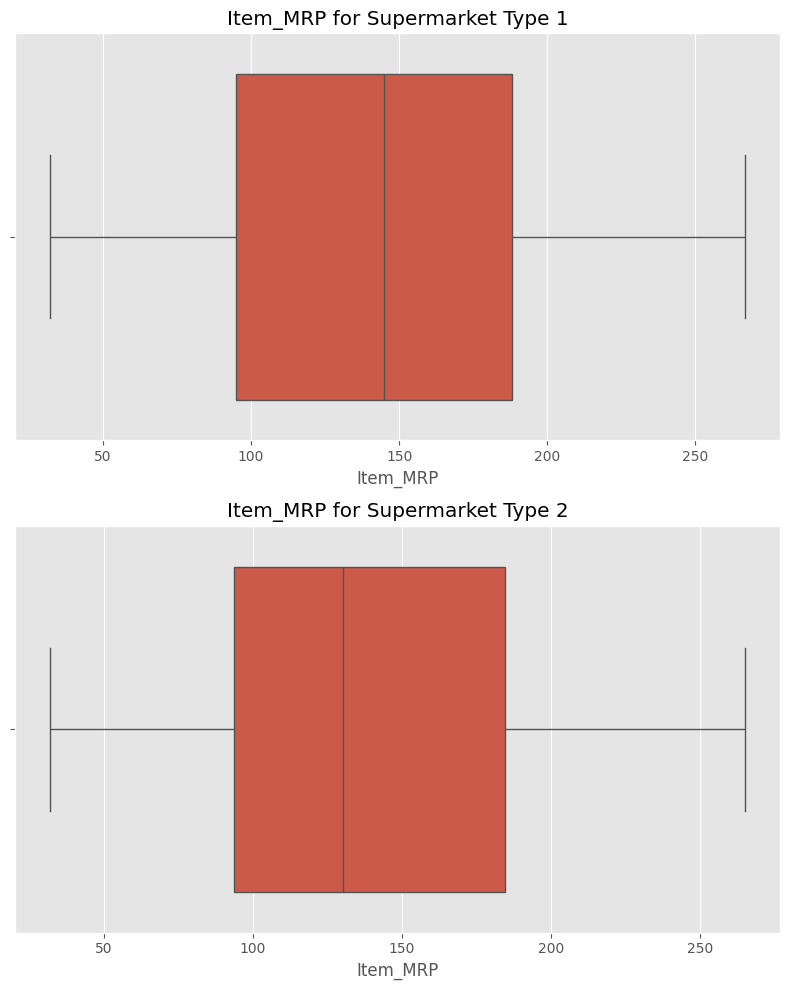

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.boxplot(x=SupType_1['Item_MRP'], ax=axes[0])
axes[0].set_title("Item_MRP for Supermarket Type 1")

sns.boxplot(x=SupType_2['Item_MRP'], ax=axes[1])
axes[1].set_title("Item_MRP for Supermarket Type 2")

plt.tight_layout()
plt.show()


### Oppgave 8
